<a href="https://colab.research.google.com/github/Fauzan-Al1/Deep_Learning/blob/main/Deep_Learning_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import semua alat yang kita butuhkan
import torch  # Library utama buat deep learning
import torch.nn as nn  # Bikin model jaringan saraf
import torch.optim as optim  # Optimizer buat update bobot model
import torch.nn.functional as F  # Aktivasi & fungsi tambahan
import numpy as np  # Bantu operasi matematika
import matplotlib.pyplot as plt  # Buat visualisasi data
from sklearn.model_selection import train_test_split  # Pisah dataset jadi training & testing
from sklearn.preprocessing import StandardScaler  # Normalisasi data
from sklearn.datasets import make_regression, make_classification  # Bikin dataset dummy
from torch.utils.data import DataLoader, TensorDataset  # Manajemen dataset di PyTorch

In [2]:
# Buat dataset regresi (prediksi angka)
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)
y = y.reshape(-1, 1)  # Ubah ke bentuk kolom biar sesuai format PyTorch

# Pisah dataset jadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar skalanya seragam
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke format tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# Masukkan ke DataLoader supaya lebih gampang di-training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [3]:
class MLPRegression(nn.Module):
    def __init__(self):
        super(MLPRegression, self).__init__()
        self.hidden1 = nn.Linear(5, 32)  # Layer pertama: input 5 fitur, output 32 neuron
        self.hidden2 = nn.Linear(32, 16) # Layer kedua: dari 32 neuron ke 16 neuron
        self.output = nn.Linear(16, 1)   # Layer terakhir: hasilkan 1 angka (prediksi)

    def forward(self, x):
        x = F.relu(self.hidden1(x))  # Aktivasi ReLU di hidden layer 1
        x = F.relu(self.hidden2(x))  # Aktivasi ReLU di hidden layer 2
        x = self.output(x)  # Output akhir tanpa aktivasi (karena regresi)
        return x

# Buat model
model = MLPRegression()

In [4]:
criterion = nn.MSELoss()  # Loss function buat regresi
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer Adam

# Training loop
epochs = 100
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()   # Reset gradien biar nggak numpuk
        y_pred = model(X_batch) # Model memprediksi output
        loss = criterion(y_pred, y_batch)  # Hitung error
        loss.backward()  # Backpropagation buat update bobot
        optimizer.step()  # Update bobot berdasarkan loss

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 9648.4277
Epoch 10, Loss: 313.0800
Epoch 20, Loss: 111.2749
Epoch 30, Loss: 127.4334
Epoch 40, Loss: 94.7850
Epoch 50, Loss: 85.9723
Epoch 60, Loss: 75.9650
Epoch 70, Loss: 106.0132
Epoch 80, Loss: 77.6898
Epoch 90, Loss: 121.1778


In [5]:
# Ubah ke mode evaluasi (supaya model nggak update bobot lagi)
model.eval()

# Matikan gradien supaya lebih hemat memori
with torch.no_grad():
    y_pred = model(X_test)  # Model memprediksi data testing
    test_loss = criterion(y_pred, y_test)  # Hitung error di data testing

print(f"Test Loss: {test_loss.item():.4f}")  # Cetak hasil error

Test Loss: 139.2994


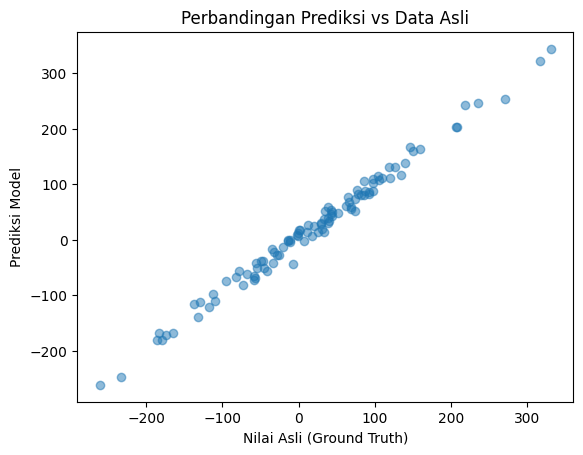

In [6]:
# Plot hasil prediksi vs data asli
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Nilai Asli (Ground Truth)")
plt.ylabel("Prediksi Model")
plt.title("Perbandingan Prediksi vs Data Asli")
plt.show()

In [7]:
# Buat dataset klasifikasi dummy (binary classification)
X, y = make_classification(n_samples=500, n_features=5, n_classes=2, random_state=42)

# Pisah dataset jadi training & testing (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data biar lebih stabil
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ubah ke tensor PyTorch
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Masukkan ke DataLoader buat training
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32, shuffle=False)

In [8]:
class MLPClassification(nn.Module):
    def __init__(self):
        super(MLPClassification, self).__init__()
        self.hidden1 = nn.Linear(5, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = torch.sigmoid(self.output(x))  # Pakai sigmoid buat output 0-1
        return x

model = MLPClassification()

In [9]:
criterion = nn.BCELoss()  # Binary Cross Entropy buat klasifikasi
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.3688
Epoch 10, Loss: 0.1841
Epoch 20, Loss: 0.0611
Epoch 30, Loss: 0.1493
Epoch 40, Loss: 0.4210
Epoch 50, Loss: 0.1547
Epoch 60, Loss: 0.2275
Epoch 70, Loss: 0.0039
Epoch 80, Loss: 0.0407
Epoch 90, Loss: 0.0107


In [10]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Konversi ke 0 atau 1
    acc = (y_pred == y_test).float().mean()
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9700


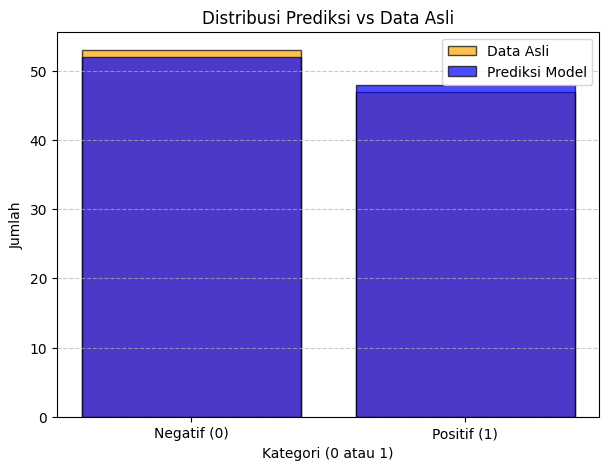

In [11]:
plt.figure(figsize=(7, 5))
plt.hist(y_test.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Data Asli", color="orange", edgecolor="black", rwidth=0.8)
plt.hist(y_pred.numpy(), bins=[-0.5, 0.5, 1.5], alpha=0.7, label="Prediksi Model", color="blue", edgecolor="black", rwidth=0.8)
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.xticks([0, 1], ["Negatif (0)", "Positif (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

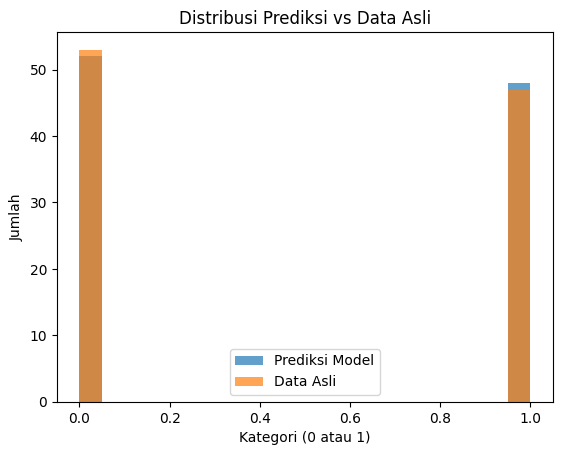

In [12]:
plt.hist(y_pred.numpy(), bins=20, alpha=0.7, label="Prediksi Model")
plt.hist(y_test.numpy(), bins=20, alpha=0.7, label="Data Asli")
plt.legend()
plt.xlabel("Kategori (0 atau 1)")
plt.ylabel("Jumlah")
plt.title("Distribusi Prediksi vs Data Asli")
plt.show()